####Feature Engineering

Creating new features that might help us to predict the probability of credit risk in a better way:
* **Loan-to-income ratio** → Direct affordability signal
* **Loan-to-value ratio** → Shows risk exposure to asset
* **Interest Burden** → Approximate yearly interest outgo
* **Applicant is Young** → Younger applicants may default more
* **Risk-adjusted LTV ratio** → Captures profitability adjusted for debt burden  
* **Credit score bucket** → Separate segments for credit scores
* **Lifetime value bucket** → Separate segments for lifetime value

In [ ]:
#New features
df['loan_to_income_ratio'] = df['loan_amount'] / df['income']
df['loan_to_value_ratio'] = df['loan_amount'] / df['property_value']
df['interest_burden']  = df['rate_of_interest'] / df['loan_amount'] * 100
df['risk_adjusted_ltv'] = df['lifetime_value'] / (1 + df['debt_to_income_ratio'])
df['is_young'] = np.where(df['age'] == '<25',1,0)
df['credit_score_bucket'] = pd.cut(df['credit_score'],bins=[400,600,700,800,df['credit_score'].max()],labels=['Poor','Fair','Good','Excellent'])
df['ltv_bucket'] = pd.cut(df['lifetime_value'],bins=[df['lifetime_value'].min(), 63, 73, 84, df['lifetime_value'].max()],labels=['Very Low', 'Low','Medium','High'])

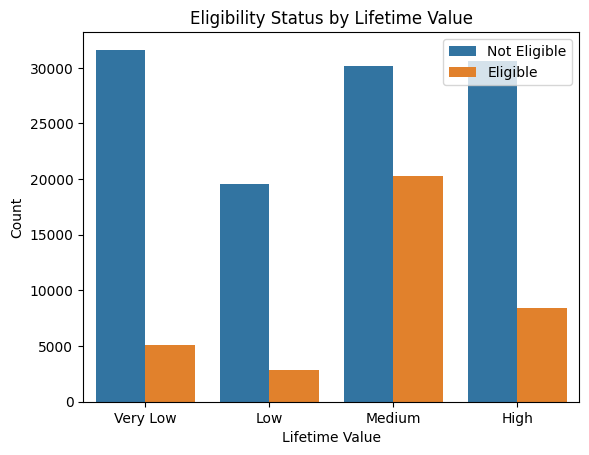

In [ ]:
#Eligibility status by Lifetime value
sns.countplot(x='ltv_bucket',hue='status',data=df)
plt.xlabel('Lifetime Value')
plt.ylabel('Count')
plt.title('Eligibility Status by Lifetime Value')
plt.legend(['Not Eligible','Eligible'])
plt.show()

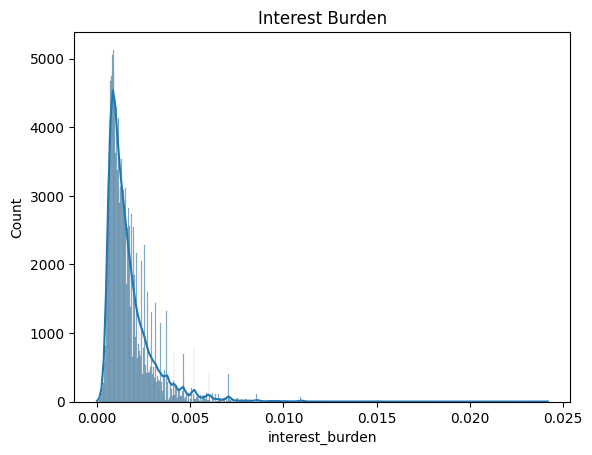

In [ ]:
#Plotting Interest burden
sns.histplot(df['interest_burden'],kde=True)
plt.title('Interest Burden')
plt.show()

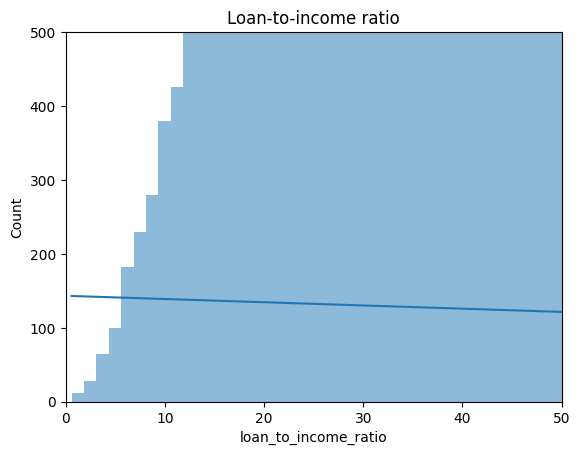

In [ ]:
#PLotting Loan-to-income ratio
sns.histplot(df['loan_to_income_ratio'],kde=True)
plt.title('Loan-to-income ratio')
plt.xlim((0,50))
plt.ylim((0,500))
plt.show()

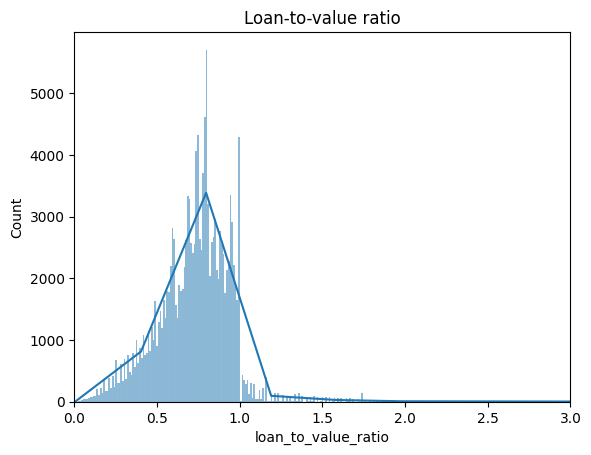

In [ ]:
#Plotting Loan-to-Value ratio
sns.histplot(df['loan_to_value_ratio'],kde=True)
plt.title('Loan-to-value ratio')
plt.xlim((0,3))
plt.show()

####Feature Selection

Filtering data, since there are large number of unuseful columns which can be dropped without a bad effect on the performance of the model.

Few factors that lenders need to keep in mind before considering loan application:
* **Applicant & Financial Health**
* **Collateral & Security**
* **Loan Nature & Risk Design**
* **Credit Profie Depth**

Which provided features are included in each of these features?
Let's find out:
1. **Applicant & Financial Health**
  * *income* → borrower's ability to repay
  * *credit_score* → core creditworthiness indicator
  * *debt_to_income_ratio* → measures existing debt burden relative to income
  * *loan_amount* → directly impacts affordability & default risk
  * *rate_of_interest* → higher rates =  higher EMIs = potential stress
  * *term* → longer terms may increase overall risk
  * *age* → ooften correlates with income stability or risk appetite
2. **Collateral & Security**
  * *property_value* → used to compute risk ratios (collateral strength)
  * *secured_by* → loans secured by assets have lower default risk
  * *lifetime_value* → Lifetime value of the applicant
3. **Loan Nature & Risk Design**
  * *loan_type* → different loan carries different risks
  * *interest_only* → can delay principal repayment, becomes risky if abused
  * *neg_ammortization* → risky loan feature, debt can grow over time
  * *lump_sum_payment* → indicates future repayment intentions or liquidity buffers
4. **Credit Profile Depth**
  * *open_credit* → exposure to other credit lines = cumulative burden
  * *credit_type* → risk varies across credit type
  * *co_applicant_credit_type* → strengthens or weakens the loan profile

In [ ]:
selected_features = ['income','credit_score','debt_to_income_ratio','loan_amount','rate_of_interest','term','age',
                'property_value','secured_by','lifetime_value','loan_type','interest_only','neg_ammortization',
                'lump_sum_payment','open_credit','credit_type','co_applicant_credit_type','loan_to_value_ratio',
                     'interest_burden','risk_adjusted_ltv']